The tech industry is a booming field filled with entrepreneurial minds. Oftentimes, this prevalent mindset only adds stress to an already high-stress environment, ultimately deteriorating the mental health and well-being of the individuals involved in that space. As aspiring, future data scientists, we were all interested in the trends of mental health within this industry as they can just as easily apply to us.  This 2014 data set provides 1095 samples with which we can explore questions such as the frequency of mental health illness and the attitudes towards mental health in comparison to geographic location. From the samples provided in this data set, our biased expectations are that there should exist a relatively large frequency of mental health disorders overall that may or may not be properly addressed by the individual or company within the tech industry. A more thorough analysis of the data should provide us with trends towards the frequency of mental health issues, attitudes towards mental health, and the overall climate surrounding this topic in the tech industry.

The following analysis uses the data set based on a mental health survey hosted by Kaggle (https://www.kaggle.com/osmi/mental-health-in-tech-survey).

The K-nearest neighbors (KNN) is a lazy, supervised machine learning algorithm. In order to classify new data points, the KNN algorithm calculates the distance of a data point to other training data points where the distance can be of any type (Euclidean, Manhattan, Hamming, etc). Next, the $k$ nearest data points are found where $k$ is integer-valued. Then, the initial selected data point is classified to a label according to what the majority of the $k$ nearest data points belong in. The advantage of KNN lies in its ease of implementation. Despite the fact that there may be more fitting methods, the KNN algorithm is proven to overall provide relatively accurate results in spite of its simplicity.

From this data set, I hoped to find a likelihood that individuals in the tech industry with mental health conditions would seek out treatment over other variables including age, company size, level of work interference, US geographical location, etc. In order to accomplish this, I decided to use the K-nearest neighbors algorithm on variables that contained measurements of some type of "distance" to find trends or correlations between certain variables.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
#plt.rc("font", size=14)
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

data = pd.read_csv("mental health in tech survey.csv")

The first pair of variables I decided to use as potential predictors of treatment were age and level of work interference. 

Before running the KNN algorithm, I first preprocessed the data set such that the two variables, age and work interference, could be worked with. For the 'age' column, I didn't include any values below $18$ and over $80$. For the 'work interference' column, I converted the responses of 'never', 'rarely', 'sometimes', and 'often' to integer values from $1$ to $4$. I then converted the integer values from $1$ through $4$ (for the work interference column) into randomly generated float values in the ranges of $(0, 2.5)$ for 'never', $(2.5, 5)$ for 'rarely', $(5, 7.5)$ for 'sometimes', and $(7.5, 10)$ for 'often'. Since these particular responses had implied distance values amongst them, I treated the values as values from an ordinal set and converted them to numerical values. Then, I scaled the data for the training and testing portions of the algorithm before reverting the transformations for the graph output. After the preprocessing, the results of KNN produced the following:

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import scale
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import random


new1 = pd.DataFrame(columns = ['Age', 'interfere', 'treatment'])

for i in range(len(data.iloc[:, 1])):
    if data.iloc[i, 1] >= 18 and data.iloc[i, 1] <= 80:
        if data.iloc[i, 8] == "Never":
            if data.iloc[i, 7] == 'No':
                new1 = new1.append({'Age': data.iloc[i,1], 'interfere': random.uniform(1.00,2.50), 'treatment': 'No'}, ignore_index=True)
            elif data.iloc[i, 7] == 'Yes':
                new1 = new1.append({'Age': data.iloc[i,1], 'interfere': random.uniform(1.00,2.50), 'treatment': 'Yes'}, ignore_index=True)
        if data.iloc[i, 8] == "Rarely":
            if data.iloc[i, 7] == 'No':
                new1 = new1.append({'Age': data.iloc[i,1], 'interfere': random.uniform(2.50,5.00), 'treatment': 'No'}, ignore_index=True)
            elif data.iloc[i, 7] == 'Yes':
                new1 = new1.append({'Age': data.iloc[i,1], 'interfere': random.uniform(2.50,5.00), 'treatment': 'Yes'}, ignore_index=True)
        if data.iloc[i, 8] == "Sometimes":
            if data.iloc[i, 7] == 'No':
                new1 = new1.append({'Age': data.iloc[i,1], 'interfere': random.uniform(5.00,7.50), 'treatment': 'No'}, ignore_index=True)
            elif data.iloc[i, 7] == 'Yes':
                new1 = new1.append({'Age': data.iloc[i,1], 'interfere': random.uniform(5.00,7.50), 'treatment': 'Yes'}, ignore_index=True)
        if data.iloc[i, 8] == "Often":
            if data.iloc[i, 7] == 'No':
                new1 = new1.append({'Age': data.iloc[i,1], 'interfere': random.uniform(7.50,10.00), 'treatment': 'No'}, ignore_index=True)
            elif data.iloc[i, 7] == 'Yes':
                new1 = new1.append({'Age': data.iloc[i,1], 'interfere': random.uniform(7.50,10.00), 'treatment': 'Yes'}, ignore_index=True)

X = new1.iloc[:, [0,1]].values
y = new1.iloc[:, 2].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

scaler=StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7946127946127947
[[ 57  43]
 [ 18 179]]
              precision    recall  f1-score   support

          No       0.76      0.57      0.65       100
         Yes       0.81      0.91      0.85       197

    accuracy                           0.79       297
   macro avg       0.78      0.74      0.75       297
weighted avg       0.79      0.79      0.79       297



The accuracy score between age and the level of work interference as predictors of treatment hovers around $79$%.

This is an indication that the relation between these variables as predictors of treatment may be a reliable one which we can look further into.

Text(0, 0.5, 'Mean Error')

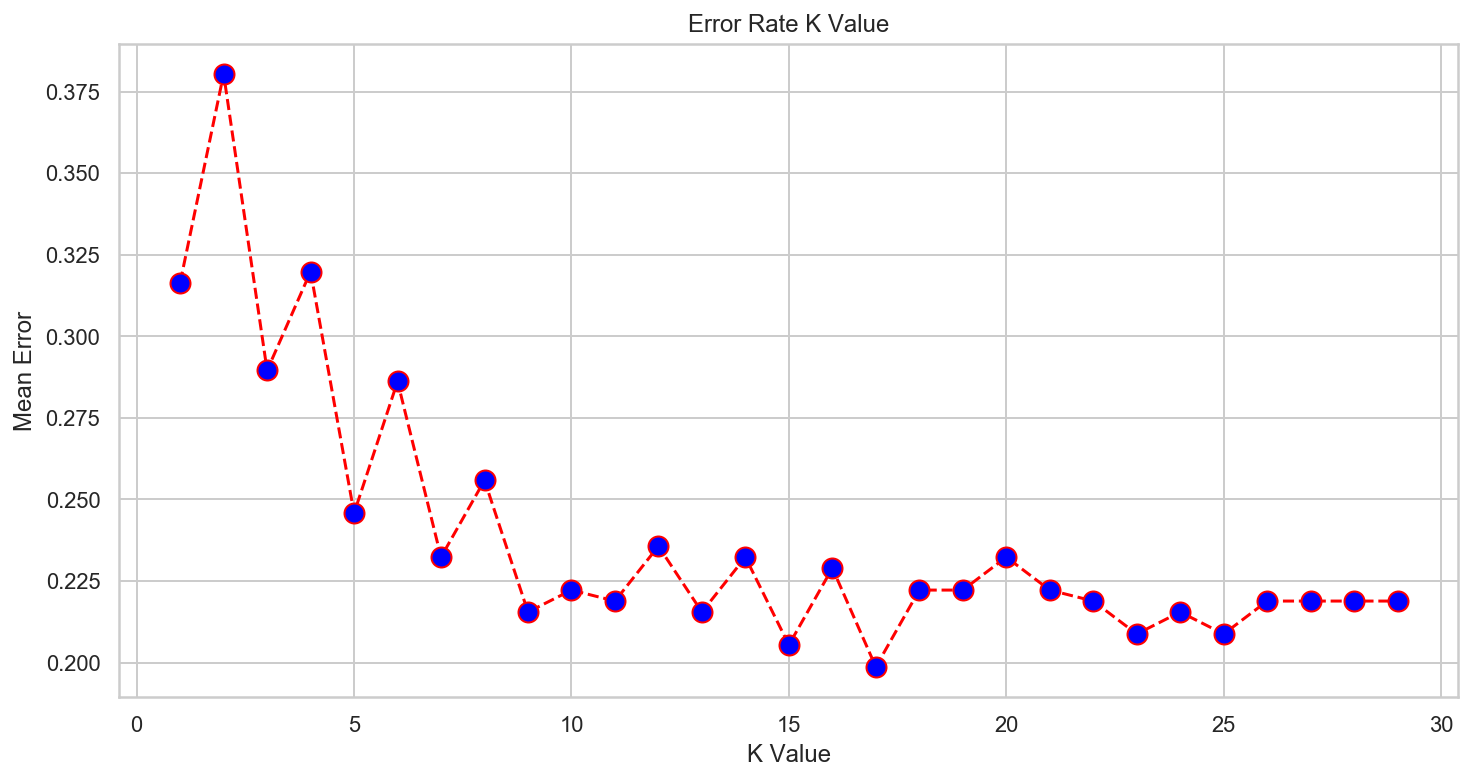

In [14]:
error=[]
for i in range(1,30):
    kk = KNeighborsClassifier(n_neighbors=i)
    kk.fit(X_train, y_train)
    pred_i = kk.predict(X_test)
    error.append(np.mean(pred_i != y_test))


plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

The above graph represents the error rate for the value of $K$ chosen in our use of the K-Nearest Neighbors algorithm. As can be seen, the error rate for this method is minimized past the $K=10$ mark (in this case, I have chosen the value $K=15$).

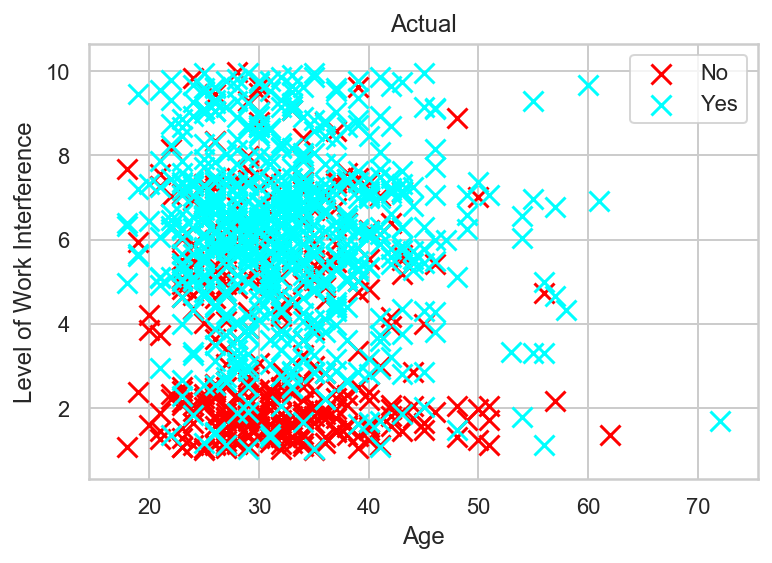

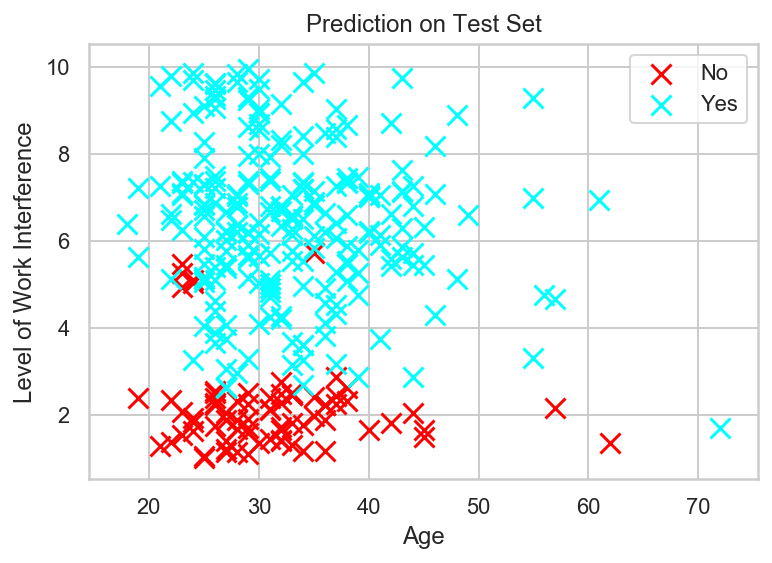

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.preprocessing import scale
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import random

scatter_x = new1['Age'].values
scatter_y = new1['interfere'].values
group = new1['treatment'].values

cdict = {'No': 'red', 'Yes': 'cyan'}


fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], marker='x', label = g, s = 100)
ax.legend()
plt.title('Actual')
plt.xlabel('Age')
plt.ylabel('Level of Work Interference')
plt.show()

X_test = scaler.inverse_transform(X_test)
X_train = scaler.inverse_transform(X_train)

xblah=[]
for i in range(len(X_test)):
    xblah.append(X_test[i][0])
xblah = np.asarray(xblah)

yblah=[]
for i in range(len(X_test)):
    yblah.append(X_test[i][1])
yblah = np.asarray(yblah)


scatter_x = xblah
scatter_y = yblah
group = y_pred

fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], marker='x', label = g, s = 100)
ax.legend()
plt.title('Prediction on Test Set')
plt.xlabel('Age')
plt.ylabel('Level of Work Interference')
plt.show()

The graph labeled "Actual" represents the whole sample set of points (age vs. level of work interference) with blue points representing individuals who sought out treatment and red points representing individuals who didn't seek out treatment. The graph labeled "Prediction on Test Set" is the KNN method's prediction of whether points are to be classified as blue (sought out treatment) or classified as red (did not seek out treatment). The bottom graph's predictions are based on the subset of points from the actual sample that were stored as a test set. 

As can be seen, the predictive graph shares a strong resemblance to the actual distribution of points represented by the top graph. However, there is a clear bias in the distribution of blue versus red points. The KNN algorithm predicts that those who are more likely to see out treatment are those who feel that their level of work interference is high. This trend can be seen across the x-axis as well so it is also held to be true regardless of age discrepancies.

The second pair of variables used as potential predictors of treatment were company size and level of work interference. 

Before running the KNN algorithm, I preprocessed the data set such that the two variables, company size and work interference, could be worked with. For the 'work interference' column, I converted the values into the randomly generated floats within specified ranges (as in the analysis of age vs. work interference). Since the values for 'company size' were all given in ranges, I similarly randomly generated an integer within the specified range and used that integer as the new value for the company size. Then, I scaled the data for the training and testing portions of the algorithm before reverting the transformations for the graph output. After the preprocessing, the results of KNN produced the following:

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.preprocessing import scale
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import random

new5 = pd.DataFrame(columns = ['employee', 'interfere', 'treatment'])

leave_values = ['Somewhat easy', "Don't know", 'Somewhat difficult', 'Very difficult', 'Very easy']
employee_values = ['6-25', 'More than 1000', '26-100', '100-500', '1-5', '500-1000']

for i in range(len(data.iloc[:, 9])):
    if data.iloc[i, 9] == '1-5':
        if data.iloc[i, 8] == 'Never':
            if data.iloc[i, 7] == 'No':
                new5 = new5.append({'employee': random.uniform(1,5), 'interfere': random.uniform(1.00,2.50), 'treatment': 'No'}, ignore_index=True)
            elif data.iloc[i, 7] == 'Yes':
                new5 = new5.append({'employee': random.uniform(1,5), 'interfere': random.uniform(1.00,2.50), 'treatment': 'Yes'}, ignore_index=True)
        if data.iloc[i, 8] == 'Rarely':
            if data.iloc[i, 7] == 'No':
                new5 = new5.append({'employee': random.uniform(1,5), 'interfere': random.uniform(2.50,5.00), 'treatment': 'No'}, ignore_index=True)
            elif data.iloc[i, 7] == 'Yes':
                new5 = new5.append({'employee': random.uniform(1,5), 'interfere': random.uniform(2.50,5.00), 'treatment': 'Yes'}, ignore_index=True)
        if data.iloc[i, 8] == 'Sometimes':
            if data.iloc[i, 7] == 'No':
                new5 = new5.append({'employee': random.uniform(1,5), 'interfere': random.uniform(5.00,7.50), 'treatment': 'No'}, ignore_index=True)
            elif data.iloc[i, 7] == 'Yes':
                new5 = new5.append({'employee': random.uniform(1,5), 'interfere': random.uniform(5.00,7.50), 'treatment': 'Yes'}, ignore_index=True)
        if data.iloc[i, 8] == 'Often':
            if data.iloc[i, 7] == 'No':
                new5 = new5.append({'employee': random.uniform(1,5), 'interfere': random.uniform(7.50,10.00), 'treatment': 'No'}, ignore_index=True)
            elif data.iloc[i, 7] == 'Yes':
                new5 = new5.append({'employee': random.uniform(1,5), 'interfere': random.uniform(7.50,10.00), 'treatment': 'Yes'}, ignore_index=True)
    if data.iloc[i, 9] == '6-25':
        if data.iloc[i, 8] == 'Never':
            if data.iloc[i, 7] == 'No':
                new5 = new5.append({'employee': random.uniform(6,25), 'interfere': random.uniform(1.00,2.50), 'treatment': 'No'}, ignore_index=True)
            elif data.iloc[i, 7] == 'Yes':
                new5 = new5.append({'employee': random.uniform(6,25), 'interfere': random.uniform(1.00,2.50), 'treatment': 'Yes'}, ignore_index=True)
        if data.iloc[i, 8] == 'Rarely':
            if data.iloc[i, 7] == 'No':
                new5 = new5.append({'employee': random.uniform(6,25), 'interfere': random.uniform(2.50,5.00), 'treatment': 'No'}, ignore_index=True)
            elif data.iloc[i, 7] == 'Yes':
                new5 = new5.append({'employee': random.uniform(6,25), 'interfere': random.uniform(2.50,5.00), 'treatment': 'Yes'}, ignore_index=True)
        if data.iloc[i, 8] == 'Sometimes':
            if data.iloc[i, 7] == 'No':
                new5 = new5.append({'employee': random.uniform(6,25), 'interfere': random.uniform(5.00,7.50), 'treatment': 'No'}, ignore_index=True)
            elif data.iloc[i, 7] == 'Yes':
                new5 = new5.append({'employee': random.uniform(6,25), 'interfere': random.uniform(5.00,7.50), 'treatment': 'Yes'}, ignore_index=True)
        if data.iloc[i, 8] == 'Often':
            if data.iloc[i, 7] == 'No':
                new5 = new5.append({'employee': random.uniform(6,25), 'interfere': random.uniform(7.50,10.00), 'treatment': 'No'}, ignore_index=True)
            elif data.iloc[i, 7] == 'Yes':
                new5 = new5.append({'employee': random.uniform(6,25), 'interfere': random.uniform(7.50,10.00), 'treatment': 'Yes'}, ignore_index=True)
    if data.iloc[i, 9] == '26-100':
        if data.iloc[i, 8] == 'Never':
            if data.iloc[i, 7] == 'No':
                new5 = new5.append({'employee': random.uniform(26,100), 'interfere': random.uniform(1.00,2.50), 'treatment': 'No'}, ignore_index=True)
            elif data.iloc[i, 7] == 'Yes':
                new5 = new5.append({'employee': random.uniform(26,100), 'interfere': random.uniform(1.00,2.50), 'treatment': 'Yes'}, ignore_index=True)
        if data.iloc[i, 8] == 'Rarely':
            if data.iloc[i, 7] == 'No':
                new5 = new5.append({'employee': random.uniform(26,100), 'interfere': random.uniform(2.50,5.00), 'treatment': 'No'}, ignore_index=True)
            elif data.iloc[i, 7] == 'Yes':
                new5 = new5.append({'employee': random.uniform(26,100), 'interfere': random.uniform(2.50,5.00), 'treatment': 'Yes'}, ignore_index=True)
        if data.iloc[i, 8] == 'Sometimes':
            if data.iloc[i, 7] == 'No':
                new5 = new5.append({'employee': random.uniform(26,100), 'interfere': random.uniform(5.00,7.50), 'treatment': 'No'}, ignore_index=True)
            elif data.iloc[i, 7] == 'Yes':
                new5 = new5.append({'employee': random.uniform(26,100), 'interfere': random.uniform(5.00,7.50), 'treatment': 'Yes'}, ignore_index=True)
        if data.iloc[i, 8] == 'Often':
            if data.iloc[i, 7] == 'No':
                new5 = new5.append({'employee': random.uniform(26,100), 'interfere': random.uniform(7.50,10.00), 'treatment': 'No'}, ignore_index=True)
            elif data.iloc[i, 7] == 'Yes':
                new5 = new5.append({'employee': random.uniform(26,100), 'interfere': random.uniform(7.50,10.00), 'treatment': 'Yes'}, ignore_index=True)
    if data.iloc[i, 9] == '100-500':
        if data.iloc[i, 8] == 'Never':
            if data.iloc[i, 7] == 'No':
                new5 = new5.append({'employee': random.uniform(100,500), 'interfere': random.uniform(1.00,2.50), 'treatment': 'No'}, ignore_index=True)
            elif data.iloc[i, 7] == 'Yes':
                new5 = new5.append({'employee': random.uniform(100,500), 'interfere': random.uniform(1.00,2.50), 'treatment': 'Yes'}, ignore_index=True)
        if data.iloc[i, 8] == 'Rarely':
            if data.iloc[i, 7] == 'No':
                new5 = new5.append({'employee': random.uniform(100,500), 'interfere': random.uniform(2.50,5.00), 'treatment': 'No'}, ignore_index=True)
            elif data.iloc[i, 7] == 'Yes':
                new5 = new5.append({'employee': random.uniform(100,500), 'interfere': random.uniform(2.50,5.00), 'treatment': 'Yes'}, ignore_index=True)
        if data.iloc[i, 8] == 'Sometimes':
            if data.iloc[i, 7] == 'No':
                new5 = new5.append({'employee': random.uniform(100,500), 'interfere': random.uniform(5.00,7.50), 'treatment': 'No'}, ignore_index=True)
            elif data.iloc[i, 7] == 'Yes':
                new5 = new5.append({'employee': random.uniform(100,500), 'interfere': random.uniform(5.00,7.50), 'treatment': 'Yes'}, ignore_index=True)
        if data.iloc[i, 8] == 'Often':
            if data.iloc[i, 7] == 'No':
                new5 = new5.append({'employee': random.uniform(100,500), 'interfere': random.uniform(7.50,10.00), 'treatment': 'No'}, ignore_index=True)
            elif data.iloc[i, 7] == 'Yes':
                new5 = new5.append({'employee': random.uniform(100,500), 'interfere': random.uniform(7.50,10.00), 'treatment': 'Yes'}, ignore_index=True)
    if data.iloc[i, 9] == '500-1000':
        if data.iloc[i, 8] == 'Never':
            if data.iloc[i, 7] == 'No':
                new5 = new5.append({'employee': random.uniform(500,1000), 'interfere': random.uniform(1.00,2.50), 'treatment': 'No'}, ignore_index=True)
            elif data.iloc[i, 7] == 'Yes':
                new5 = new5.append({'employee': random.uniform(500,1000), 'interfere': random.uniform(1.00,2.50), 'treatment': 'Yes'}, ignore_index=True)
        if data.iloc[i, 8] == 'Rarely':
            if data.iloc[i, 7] == 'No':
                new5 = new5.append({'employee': random.uniform(500,1000), 'interfere': random.uniform(2.50,5.00), 'treatment': 'No'}, ignore_index=True)
            elif data.iloc[i, 7] == 'Yes':
                new5 = new5.append({'employee': random.uniform(500,1000), 'interfere': random.uniform(2.50,5.00), 'treatment': 'Yes'}, ignore_index=True)
        if data.iloc[i, 8] == 'Sometimes':
            if data.iloc[i, 7] == 'No':
                new5 = new5.append({'employee': random.uniform(500,1000), 'interfere': random.uniform(5.00,7.50), 'treatment': 'No'}, ignore_index=True)
            elif data.iloc[i, 7] == 'Yes':
                new5 = new5.append({'employee': random.uniform(500,1000), 'interfere': random.uniform(5.00,7.50), 'treatment': 'Yes'}, ignore_index=True)
        if data.iloc[i, 8] == 'Often':
            if data.iloc[i, 7] == 'No':
                new5 = new5.append({'employee': random.uniform(500,1000), 'interfere': random.uniform(7.50,10.00), 'treatment': 'No'}, ignore_index=True)
            elif data.iloc[i, 7] == 'Yes':
                new5 = new5.append({'employee': random.uniform(500,1000), 'interfere': random.uniform(7.50,10.00), 'treatment': 'Yes'}, ignore_index=True)
    if data.iloc[i, 9] == 'More than 1000':
        if data.iloc[i, 8] == 'Never':
            if data.iloc[i, 7] == 'No':
                new5 = new5.append({'employee': random.uniform(1000,10000), 'interfere': random.uniform(1.00,2.50), 'treatment': 'No'}, ignore_index=True)
            elif data.iloc[i, 7] == 'Yes':
                new5 = new5.append({'employee': random.uniform(1000,10000), 'interfere': random.uniform(1.00,2.50), 'treatment': 'Yes'}, ignore_index=True)
        if data.iloc[i, 8] == 'Rarely':
            if data.iloc[i, 7] == 'No':
                new5 = new5.append({'employee': random.uniform(1000,10000), 'interfere': random.uniform(2.50,5.00), 'treatment': 'No'}, ignore_index=True)
            elif data.iloc[i, 7] == 'Yes':
                new5 = new5.append({'employee': random.uniform(1000,10000), 'interfere': random.uniform(2.50,5.00), 'treatment': 'Yes'}, ignore_index=True)
        if data.iloc[i, 8] == 'Sometimes':
            if data.iloc[i, 7] == 'No':
                new5 = new5.append({'employee': random.uniform(1000,10000), 'interfere': random.uniform(5.00,7.50), 'treatment': 'No'}, ignore_index=True)
            elif data.iloc[i, 7] == 'Yes':
                new5 = new5.append({'employee': random.uniform(1000,10000), 'interfere': random.uniform(5.00,7.50), 'treatment': 'Yes'}, ignore_index=True)
        if data.iloc[i, 8] == 'Often':
            if data.iloc[i, 7] == 'No':
                new5 = new5.append({'employee': random.uniform(1000,10000), 'interfere': random.uniform(7.50,10.00), 'treatment': 'No'}, ignore_index=True)
            elif data.iloc[i, 7] == 'Yes':
                new5 = new5.append({'employee': random.uniform(1000,10000), 'interfere': random.uniform(7.50,10.00), 'treatment': 'Yes'}, ignore_index=True)



X = new5.iloc[:, [0,1]].values
y = new5.iloc[:, 2].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

scaler=StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7625418060200669
[[ 50  58]
 [ 13 178]]
              precision    recall  f1-score   support

          No       0.79      0.46      0.58       108
         Yes       0.75      0.93      0.83       191

    accuracy                           0.76       299
   macro avg       0.77      0.70      0.71       299
weighted avg       0.77      0.76      0.74       299



The accuracy score between company size and the level of work interference as predictors of treatment hovers around $76$%.

Text(0, 0.5, 'Mean Error')

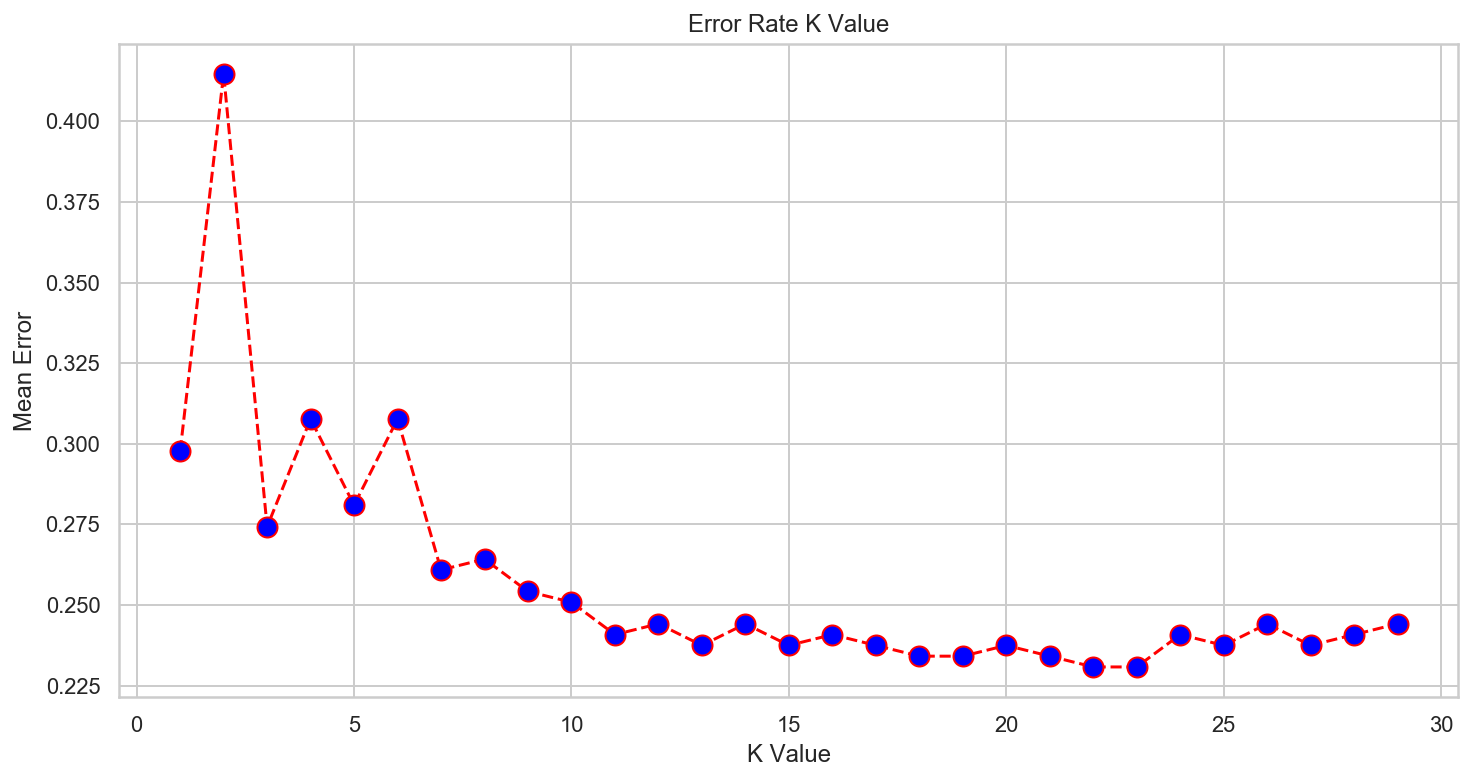

In [17]:
error=[]
for i in range(1,30):
    kk = KNeighborsClassifier(n_neighbors=i)
    kk.fit(X_train, y_train)
    pred_i = kk.predict(X_test)
    error.append(np.mean(pred_i != y_test))


plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

The graph above deepicts the error rate for the value of $K$ chosen for the KNN algorithm. As shown above, the error rate for KNN is minimized past the $K=15$ mark. For my particular analysis and the graphs above, the value of $K=25$ was chosen such that the accuracy score leveled out to around $76\%$. 

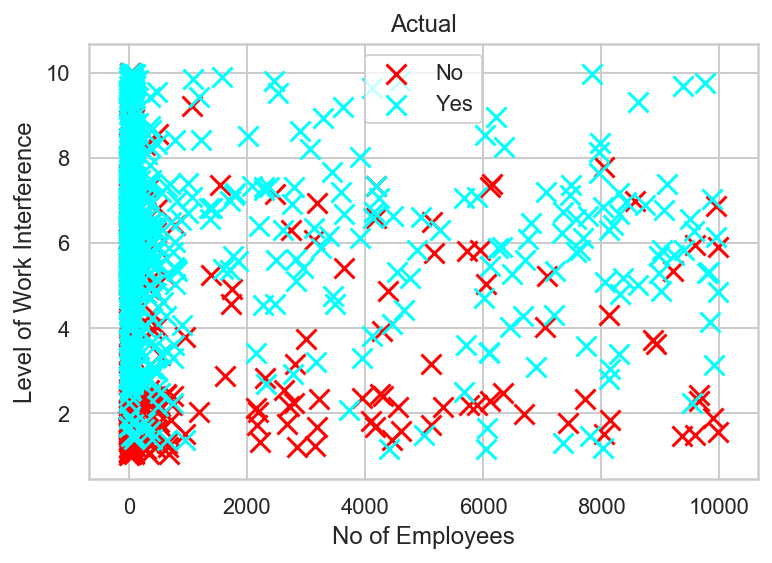

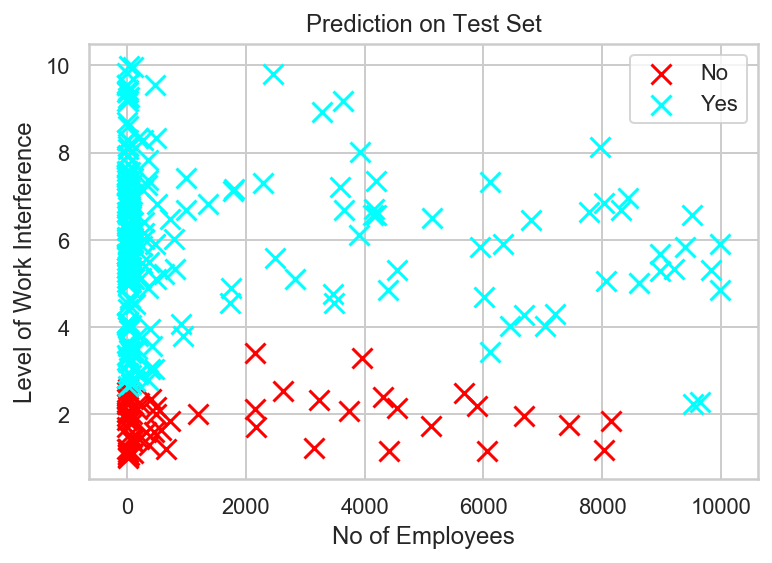

In [18]:
scatter_x = new5['employee'].values
scatter_y = new5['interfere'].values
group = new5['treatment'].values

cdict = {'No': 'red', 'Yes': 'cyan'}


fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], marker='x', label = g, s = 100)
ax.legend()
plt.title('Actual')
plt.xlabel('No of Employees')
plt.ylabel('Level of Work Interference')
plt.show()


X_test = scaler.inverse_transform(X_test)
X_train = scaler.inverse_transform(X_train)

xblah=[]
for i in range(len(X_test)):
    xblah.append(X_test[i][0])
xblah = np.asarray(xblah)

yblah=[]
for i in range(len(X_test)):
    yblah.append(X_test[i][1])
yblah = np.asarray(yblah)


scatter_x = xblah
scatter_y = yblah
group = y_pred

fig, ax = plt.subplots()

for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], marker='x', label = g, s = 100)
ax.legend()
plt.title('Prediction on Test Set')
plt.xlabel('No of Employees')
plt.ylabel('Level of Work Interference')
plt.show()


Here, we can see again that the KNN algorithm predicts that those who are more likely to see out treatment are those who feel that their level of work interference is high. This trend can be seen across the x-axis as well so it is also held to be true regardless of company size.

Overall, the results of KNN showed a strong correlation between pairs of variables like (age, work interference), (company size, work interference) as predictors for treatment. The commonality amongst the successful pairs was the level of work interference variable which heavily implies that this particular variable is the most dominant factor in seeking treatment. A more in-depth analysis of factors predicting an individual's likelihood of seeking treatment can look to compare other variables against work interference to see whether level of work interference is undisputedly the most important factor. Another perspective to take on is the relation between other variables and whether they can be strong indicators of treatment as well.

Future further analysis of the dataset using KNN can look more into the significance of that particular variable and also include analysis of other variables that weren't fully utilized.
